## Import Libraries

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- transactions_id: Unique identifier for each transaction
- sale_date: Date of the sale
- sale_time: Time of the sale
- customer_id: Unique identifier for each customer
- gender: Gender of the customer
- age: Age of the customer
- category: Product category (e.g., Clothing, Beauty)
- quantiy: Quantity of the product purchased
- price_per_unit: Price per unit of the product
- cogs: Cost of goods sold
- total_sale: Total sales amount

## Load Data

In [130]:
df = pd.read_csv("Retail Sales Analysis.csv")
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [131]:
df.tail()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
1995,1857,2022-11-09,12:15:00,109,Male,60.0,Electronics,2.0,25.0,7.5,50.0
1996,211,2022-09-12,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1997,650,2023-10-08,12:41:00,98,Male,55.0,Electronics,1.0,30.0,15.0,30.0
1998,1211,2023-11-22,14:59:00,82,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1999,1650,2022-09-23,16:24:00,89,Male,55.0,Electronics,1.0,30.0,10.8,30.0


In [132]:
df.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


## Data Cleansing

In [133]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [135]:
df.shape

(2000, 11)

In [136]:
col_summary = pd.DataFrame(df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in df.columns:
    na_list.append(df[col].isna().sum())
    unique_list.append(df[col].nunique())
    dtype_list.append(df[col].dtype)

col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,transactions_id,0,2000,int64
1,sale_date,0,647,object
2,sale_time,0,766,object
3,customer_id,0,155,int64
4,gender,0,2,object
5,age,10,47,float64
6,category,0,3,object
7,quantiy,3,4,float64
8,price_per_unit,3,5,float64
9,cogs,3,276,float64


In [137]:
#drop missing value
df = df.dropna()

In [138]:
#number of duplicated data
df.duplicated().sum()

0

In [139]:
df.isna().sum()

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

In [140]:
df.drop(columns=['sale_time'], inplace=True)

In [141]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [142]:
df['age'] = df['age'].astype(int)
df['quantiy'] = df['quantiy'].astype(int)

In [143]:
df['profit'] = df['total_sale'] - (df['quantiy'] * df['cogs'])

In [144]:
df['sale_year'] = df['sale_date'].dt.to_period('Y')
df['sale_month'] = df['sale_date'].dt.to_period('M')
df.head()

,transactions_id,sale_date,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale,profit,sale_year,sale_month
0,180,2022-11-05,117,Male,41,Clothing,3,300.0,129.0,900.0,513.0,2022,2022-11
1,522,2022-07-09,52,Male,46,Beauty,3,500.0,145.0,1500.0,1065.0,2022,2022-07
2,559,2022-12-12,5,Female,40,Clothing,4,300.0,84.0,1200.0,864.0,2022,2022-12
3,1180,2022-01-06,85,Male,41,Clothing,3,300.0,129.0,900.0,513.0,2022,2022-01
4,1522,2022-11-14,48,Male,46,Beauty,3,500.0,235.0,1500.0,795.0,2022,2022-11


1. This dataset has 13 features and 1987 observations
2. There are missing values age, quantity, price_per_unit, cogs, total_sale and need to be deleted
3. Need to convert sale_date to datetime format and drop sale_time
4. Need to convert the age and quantity data format to int
5. No duplicate data
6. Looking for profit from the total_sale - cogs column

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactions_id  1987 non-null   int64         
 1   sale_date        1987 non-null   datetime64[ns]
 2   customer_id      1987 non-null   int64         
 3   gender           1987 non-null   object        
 4   age              1987 non-null   int64         
 5   category         1987 non-null   object        
 6   quantiy          1987 non-null   int64         
 7   price_per_unit   1987 non-null   float64       
 8   cogs             1987 non-null   float64       
 9   total_sale       1987 non-null   float64       
 10  profit           1987 non-null   float64       
 11  sale_year        1987 non-null   period[A-DEC] 
 12  sale_month       1987 non-null   period[M]     
dtypes: datetime64[ns](1), float64(4), int64(4), object(2), period[A-DEC](1), period[M](1)
memory 

# Data understanding

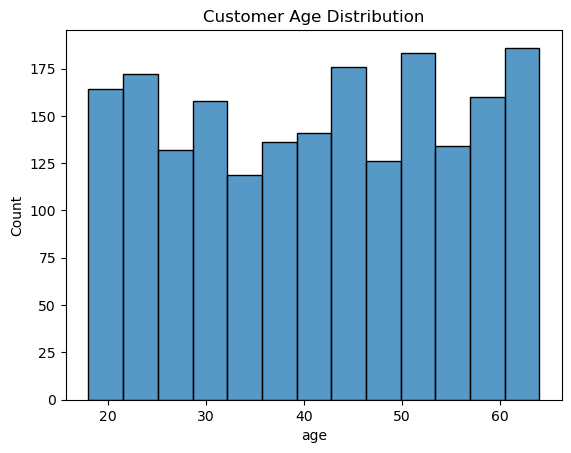

In [146]:
# Customer Age Distribution
sns.histplot(data=df, x='age')
plt.title('Customer Age Distribution')
plt.show()

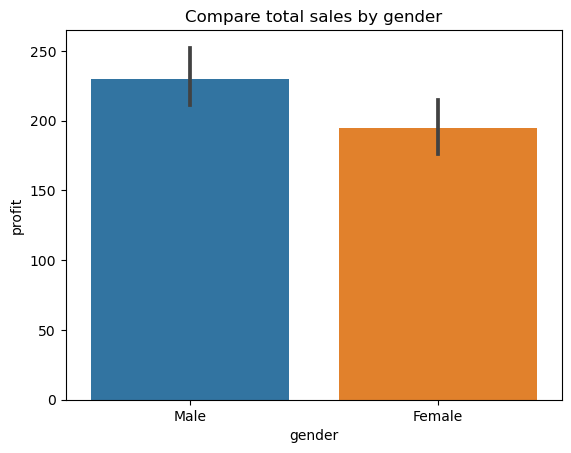

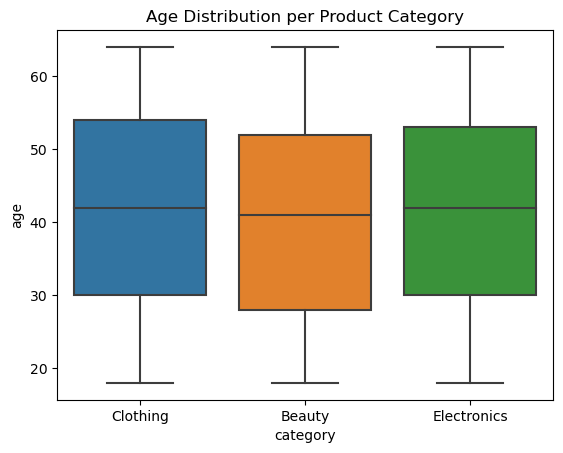

In [147]:
# Compare total sales by gender
sns.barplot(x='gender', y='profit', data=df)
plt.title('Compare total sales by gender')
plt.show()

# Looking at the relationship between product category and age
sns.boxplot(x='category', y='age', data=df)
plt.title('Age Distribution per Product Category')
plt.show()

<AxesSubplot:>

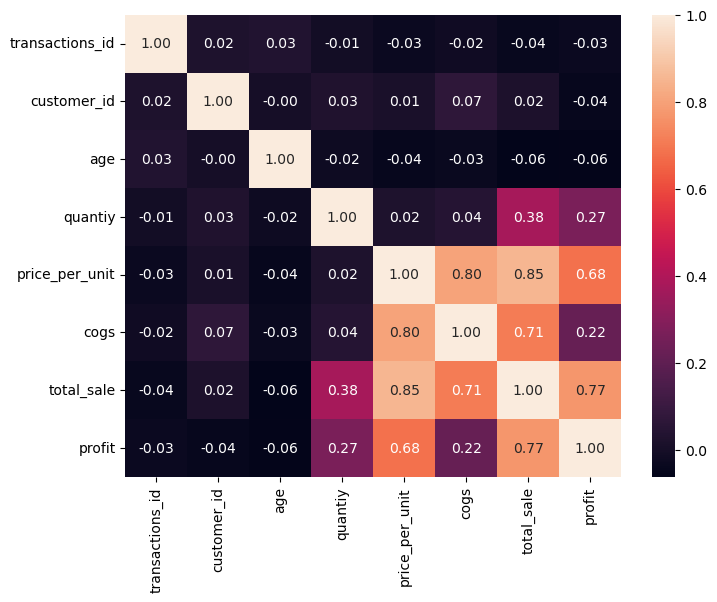

In [148]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. Quantity and cogs There is a positive correlation between quantity and cost of goods sold, although not as strong as the correlation between price_per_unit and cogs. This shows that as more products are sold, production costs also tend to increase.

## EDA Questions
1. Total profit company make each year?
2. How is the trend of the number of buyers and total turnover from month to month?
3. What product category is the biggest contributor to annual profits?
4. Who are Top 10 Customers with the most money spend?
5. On what day of the week do the most transactions occur


### 1. Total profit company make each year?

In [149]:
profit_by_year = df.groupby('sale_year')['profit'].sum().reset_index()
display(profit_by_year)

,sale_year,profit
0,2022,205417.50
1,2023,215951.45


### 2. How is the trend of the number of buyers and total turnover from month to month?

In [150]:
monthly_data = (df
                .groupby('sale_month')
                .agg(num_buyer=('customer_id','nunique'),
                     total_omzet=('profit','sum'))
                .reset_index())

monthly_data['sale_month'] = monthly_data['sale_month'].astype(str) 
monthly_data

,sale_month,num_buyer,total_omzet
0,2022-01,49,13795.30
1,2022-02,38,8549.20
2,2022-03,41,14019.15
3,2022-04,45,16744.95
4,2022-05,43,13788.60
5,2022-06,38,12759.50
6,2022-07,39,13028.75
7,2022-08,47,11814.15
8,2022-09,84,24913.50
9,2022-10,87,19022.70


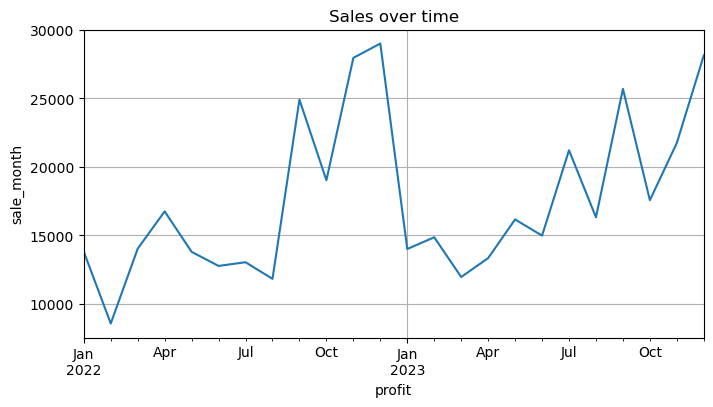

In [151]:
plt.figure(figsize=(8,4))
df.groupby('sale_month')['profit'].sum().plot()
plt.title('Sales over time')
plt.xlabel('profit')
plt.ylabel('sale_month')
plt.grid(True)
plt.show()

### 3. What product category is the biggest contributor to annual profits?

In [152]:
profit_by_year_category = (
    df.groupby(['sale_year', 'category'])['profit']
    .sum()
    .reset_index()
    .sort_values(by='profit', ascending=False)
)
display(profit_by_year_category)

,sale_year,category,profit
4,2023,Clothing,75174.70
5,2023,Electronics,71894.40
3,2023,Beauty,68882.35
2,2022,Electronics,68796.45
0,2022,Beauty,68559.45
1,2022,Clothing,68061.60


In [21]:
profit_by_category = (
    df.groupby('category')['profit']
    .sum()
    .reset_index()
    .sort_values(by='profit', ascending=False)
    
)
display(profit_by_category)

,category,profit
1,Clothing,143236.30
2,Electronics,140690.85
0,Beauty,137441.80


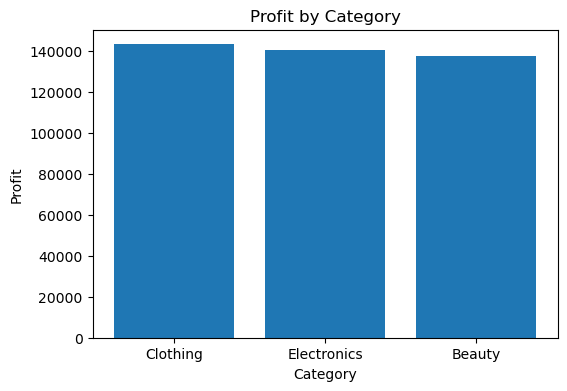

In [22]:
plt.figure(figsize=(6, 4))
plt.bar(profit_by_category['category'], profit_by_category['profit'])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.show()

### 4. Who are Top 10 Customers with the most money spend ?

In [23]:
top10_cust = (df
            .groupby('customer_id')
            .agg(total_spend=('profit','sum'))
            .reset_index()
            .sort_values('total_spend',ascending=False)
            .head(10)
            )

top10_cust

,customer_id,total_spend
2,3,23366.05
0,1,18401.30
4,5,18267.70
1,2,14676.25
3,4,13360.95
86,87,7897.55
53,54,6294.65
110,111,5888.35
54,55,5822.00
60,61,5326.45


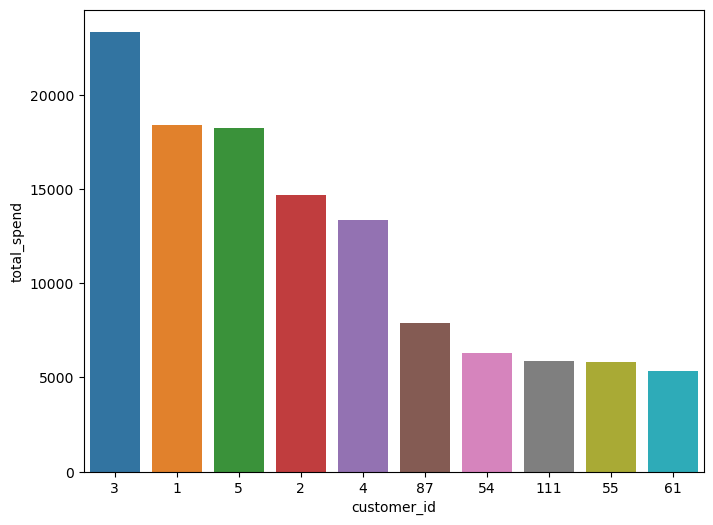

In [24]:
plt.figure(figsize=(8,6))
top10_cust['customer_id'] = top10_cust['customer_id'].astype(str)
sns.barplot(data=top10_cust, x='customer_id', y='total_spend')
plt.show()

### 5. On what day of the week do the most transactions occur? ?

Days with the most transactions: Sunday


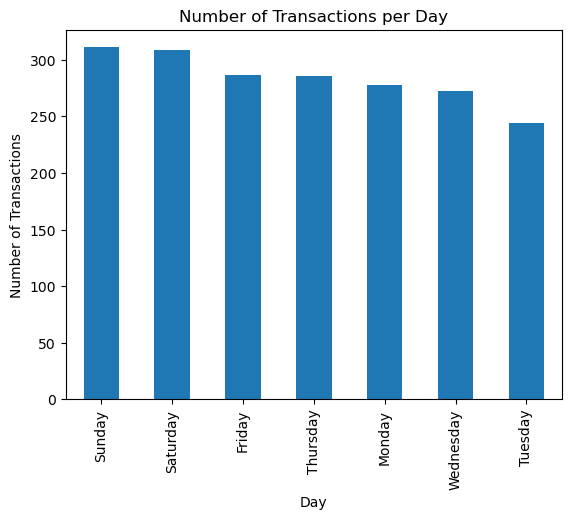

In [128]:
# Extract days of the week
df['day_of_week'] = df['sale_date'].dt.day_name()

# Calculate the number of transactions per day
transactions_per_day = df['day_of_week'].value_counts()

# Look for days with the most transactions
busiest_day = transactions_per_day.idxmax()

print("Days with the most transactions:", busiest_day)

transactions_per_day.plot(kind='bar')
plt.title('Number of Transactions per Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

## Conclusion
- Data analysis shows that the company has succeeded in increasing its profitability consistently from year to year. A clear seasonal pattern is visible with a significant increase in sales in the fourth quarter of each year, indicating the existence of seasonal factors that influence sales performance.
- The clothing category is the backbone of the company's profitability, followed by the electronics and beauty categories. However, there is potential to increase contributions from other categories.
- The largest customers make a very significant contribution to the company's total sales. This shows the importance of maintaining and improving relationships with key customers.
- Sunday is the day with the highest transactions, but the distribution of transactions is quite even throughout the week. This indicates that the company needs to maintain consistent service on all days.

## Recommendation
- Expand product portfolio, especially in the electronics and beauty categories, to increase revenue sources and attract new customers.
- Implement more personalized and targeted marketing strategies, both online and offline, to increase customer engagement and encourage purchases.
- Present an attractive loyalty program to retain loyal customers and encourage repeat purchases
- Don't just focus on quarter 4. Plan exciting promotions throughout the year to maintain customer interest and level sales.